# **EDA**

###**Q1. Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows. (Show the shape and column names as well.)**

In [2]:
from google.colab import files
import pandas as pd

# 1) Upload the CSV
uploaded = files.upload()  # choose your "Bike Details.csv" (or similar)

# 2) Read the uploaded file
fname = next(iter(uploaded))  # gets the uploaded filename
try:
    df = pd.read_csv(fname)
except UnicodeDecodeError:
    df = pd.read_csv(fname, encoding="latin1")  # fallback if encoding error

# 3) Show required outputs
print("First 10 rows:")
display(df.head(10))

print("\nShape (rows, columns):", df.shape)

print("\nColumn names:")
print(df.columns.tolist())



Saving BIKE DETAILS.csv to BIKE DETAILS.csv
First 10 rows:


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0



Shape (rows, columns): (1061, 7)

Column names:
['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']


###**Q2. Check for missing values in all columns and describe your approach for handling them.**

  - If only a few rows are missing → Drop them (df.dropna()).

  - If many values are missing in a column → Either:

       - Fill with a placeholder (like "Unknown") if categorical.

      - Fill with mean/median if numerical.

  - If a column is mostly missing → Consider dropping that column.

In [3]:
# Check total missing values per column
print("Missing values per column:")
print(df.isnull().sum())

# Percentage of missing values per column
print("\nPercentage of missing values:")
print((df.isnull().mean() * 100).round(2))


Missing values per column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage of missing values:
name                  0.0
selling_price         0.0
year                  0.0
seller_type           0.0
owner                 0.0
km_driven             0.0
ex_showroom_price    41.0
dtype: float64


In [4]:
# Option 1: Drop rows with missing values
df_clean = df.dropna()

# Option 2: Fill missing categorical with 'Unknown' and numerical with median
for col in df.columns:
    if df[col].dtype == 'object':  # categorical
        df[col] = df[col].fillna('Unknown')
    else:  # numeric
        df[col] = df[col].fillna(df[col].median())


In [5]:
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


###**Q3. Plot the distribution of selling prices using a histogram and describe the overall trend.**

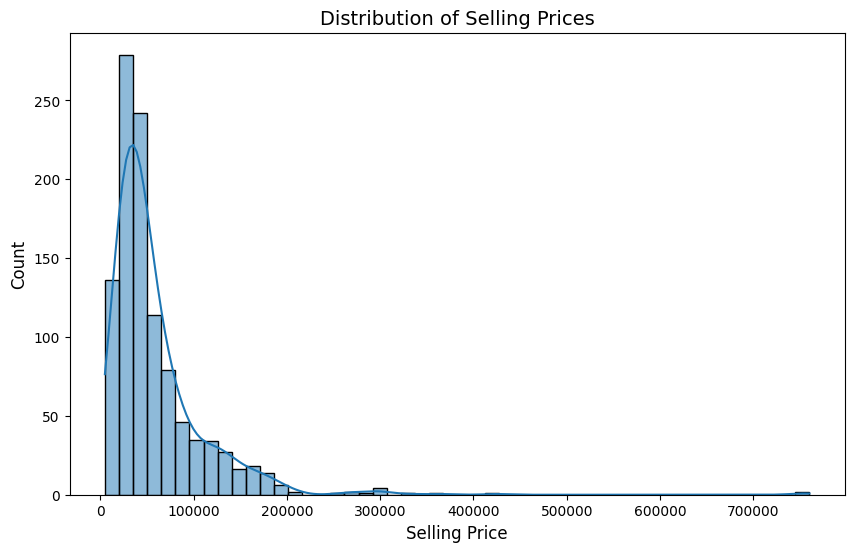

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['selling_price'], bins=50, kde=True)

plt.title("Distribution of Selling Prices", fontsize=14)
plt.xlabel("Selling Price", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


  - Selling prices are right-skewed (many cheaper bikes, few expensive ones).

  - Most bikes fall within a lower price range.

  - A long tail indicates a few very high-priced bikes (outliers).   

###**Q4. Create a bar plot to visualize the average selling price for each seller_type and write one observation.**

  seller_type  selling_price
0      Dealer   46666.666667
1  Individual   59711.923223


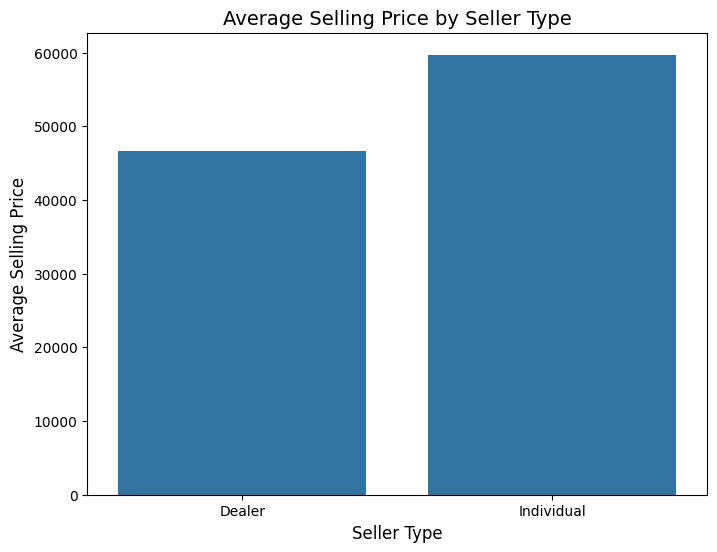

In [7]:
avg_price_by_seller = df.groupby('seller_type')['selling_price'].mean().reset_index()
print(avg_price_by_seller)

plt.figure(figsize=(8,6))
sns.barplot(x='seller_type', y='selling_price', data=avg_price_by_seller)

plt.title("Average Selling Price by Seller Type", fontsize=14)
plt.xlabel("Seller Type", fontsize=12)
plt.ylabel("Average Selling Price", fontsize=12)
plt.show()


The bar plot shows that Dealer sellers have a higher average selling price compared to Individual sellers. This suggests that dealers usually sell newer or better-maintained bikes, while individuals tend to sell relatively lower-priced used bikes.

###**Q5. Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.**

       owner      km_driven
0  1st owner   32816.583333
1  2nd owner   39288.991870
2  3rd owner   33292.181818
3  4th owner  311500.000000


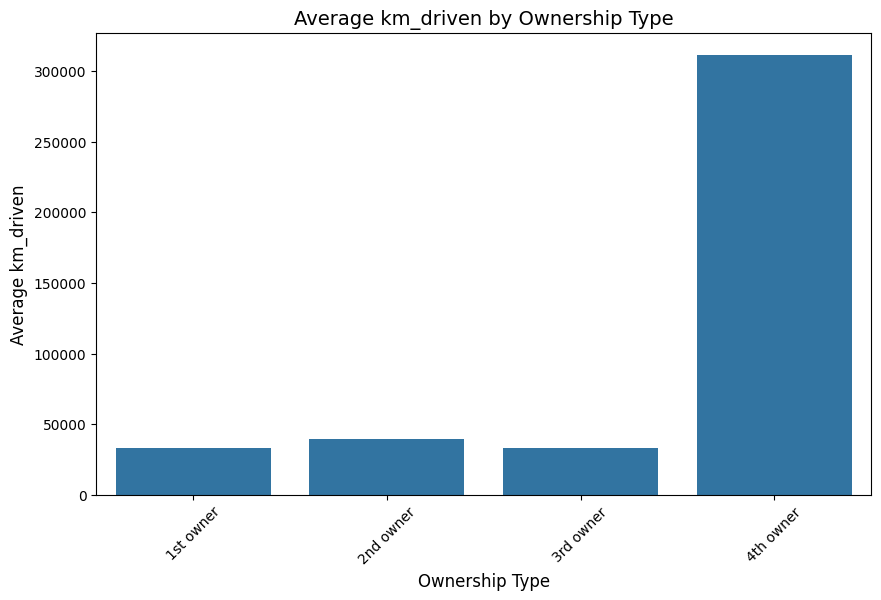

In [8]:
avg_km_by_owner = df.groupby('owner')['km_driven'].mean().reset_index()
print(avg_km_by_owner)

plt.figure(figsize=(10,6))
sns.barplot(x='owner', y='km_driven', data=avg_km_by_owner)

plt.title("Average km_driven by Ownership Type", fontsize=14)
plt.xlabel("Ownership Type", fontsize=12)
plt.ylabel("Average km_driven", fontsize=12)
plt.xticks(rotation=45)  # rotate labels if they overlap
plt.show()


The chart shows that 1st, 2nd, and 3rd owner bikes have similar average kilometers driven (around 30,000–40,000 km). However, 4th owner bikes stand out with an extremely high average (over 300,000 km), which likely indicates the presence of outliers in the data.

###**Q6. Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.**

In [9]:
print("Before removing outliers:")
print(df['km_driven'].describe())


Before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64


In [11]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter dataset
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]


In [12]:
print("\nAfter removing outliers:")
print(df_no_outliers['km_driven'].describe())

print("\nRows before:", df.shape[0])
print("Rows after:", df_no_outliers.shape[0])



After removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

Rows before: 1061
Rows after: 1022


Before removing outliers, the maximum km_driven was 880,000 km, which is unrealistically high for bikes. After applying the IQR method, these extreme values were removed, and the maximum reduced to 86,000 km, which is much more reasonable. The dataset size dropped from 1061 rows to 1022 rows, showing that only a small fraction of extreme records were excluded.

###**Q7.  Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.**

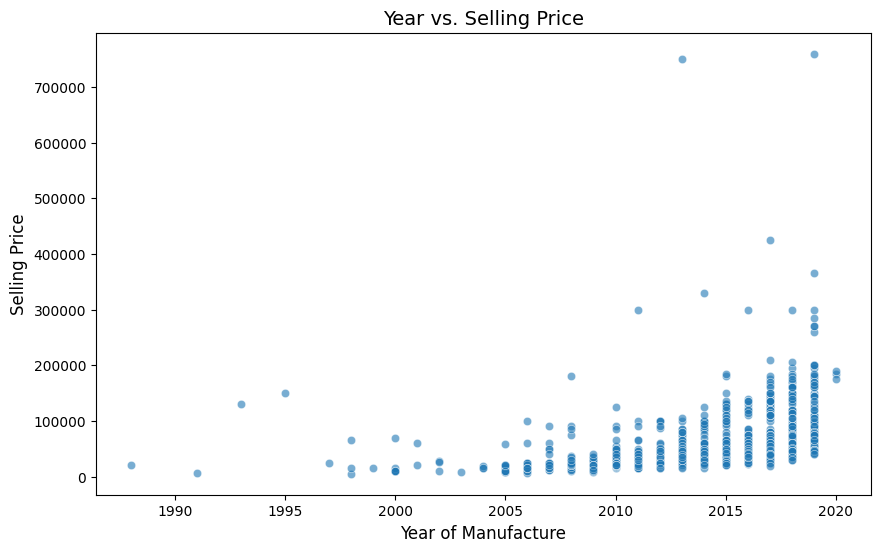

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='year', y='selling_price', data=df_no_outliers, alpha=0.6)

plt.title("Year vs. Selling Price", fontsize=14)
plt.xlabel("Year of Manufacture", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.show()


The scatter plot shows that newer bikes (recent years) tend to have higher selling prices, while older bikes (1990s–early 2000s) are priced much lower. The trend indicates that bike value generally depreciates with age. However, there are some outliers where older bikes are still listed at high prices, likely due to premium or rare models.

###**Q8. Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.**

In [14]:
# One-hot encoding seller_type
df_encoded = pd.get_dummies(df_no_outliers, columns=['seller_type'])

# Display first 5 rows
df_encoded.head()


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,72752.5,False,True
1,Honda Dio,45000,2017,1st owner,5650,72752.5,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,72752.5,False,True


###**Q9.Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?**

                   selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.389686  -0.403412           0.747030
year                    0.389686  1.000000  -0.462554           0.095939
km_driven              -0.403412 -0.462554   1.000000          -0.160169
ex_showroom_price       0.747030  0.095939  -0.160169           1.000000


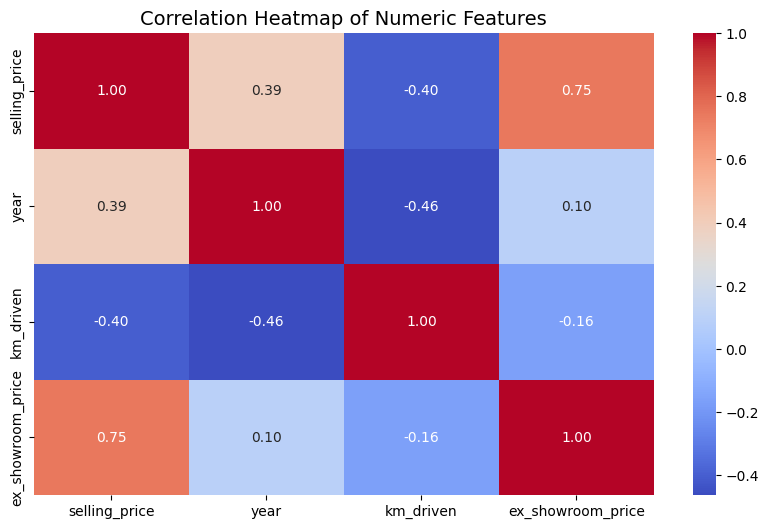

In [17]:
# Select only numeric columns
numeric_df = df_no_outliers.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Display correlation matrix
print(corr_matrix)

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()



The heatmap shows that selling_price is most strongly correlated with ex_showroom_price (0.75). Additionally, year has a moderate positive correlation with selling_price (0.39), while km_driven has a moderate negative correlation (-0.40). This indicates that newer bikes with higher showroom prices and lower mileage tend to fetch higher resale values.

###**Q10. Summarize your findings in a brief report:**
  - What are the most important factors affecting a bike's selling price?
  -  Mention any data cleaning or feature engineering you performed.

####Findings Report

Important Factors Affecting Selling Price:

  - The ex-showroom price has the strongest positive correlation with selling price (0.75). Bikes with higher original showroom prices generally have higher resale value.

  - Year of manufacture also plays a role: newer bikes command higher selling prices.

  - Kilometers driven (km_driven) shows a moderate negative correlation: bikes with more mileage tend to sell for less.

Data Cleaning & Preprocessing:

  - Handled missing values by filling with median (for numeric) and "Unknown" (for categorical).

  - Applied the IQR method to detect and remove outliers in km_driven, which eliminated extreme and unrealistic values (e.g., bikes with 880,000 km).

  - Used one-hot encoding on categorical variables (seller_type) to convert them into numerical format for analysis.

Overall Insights:

  - Newer, lower-mileage bikes from higher showroom price ranges are valued more in the resale market.

  - Outliers (e.g., 4th owner bikes with unrealistically high km driven) can distort averages, so cleaning is essential.

  - Seller type also influences pricing: dealers generally list higher-priced bikes compared to individual sellers.